In [1]:
# IMPORTING THE LIBRARIES.
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# LOADING THE DATASET.

In [2]:
data=pd.read_excel(r'/kaggle/input/red-wine-dataset-from-uci-repository/REDWINE DATASET.xlsx')

# SPLITTING THE DATASET

In [3]:
X=data.drop('quality',axis=1)
Y=data['quality']
split_value=int(len(X)*0.8)
X_train=X[:split_value]
Y_train=Y[:split_value]
X_test=X[split_value:]
Y_test=Y[split_value:]
label_map={3:0,4:1,5:2,6:3,7:4,8:5}
Y_train=Y_train.map(label_map)
Y_test=Y_test.map(label_map)
X_test=tf.keras.utils.normalize(X_test,axis=-1)  # RE-MAPPING THE CLASS LABELS AS DURING EDA WE GOT TO KNOW ONLY 6 CLASSE[3,4,5,6,7,8] ARE THERE IN THE LABEL.
X_train=tf.keras.utils.normalize(X_train,axis=-1)

# **CREATING A NEURAL NETWORK ARCHITECTURE USING TENSORLOW.**

In [4]:
# USING SEQUENTAIL APPROCH FOR CREATING THE ANN MODEL.
model=Sequential()
model.add(Dense(15,input_shape=(11,),activation='relu'))
#model.add(Dense(15,activation='relu'))
#model.add(Dense(15,activation='relu'))
#model.add(Dense(32,activation='tanh'))
model.add(Dense(16,activation='relu'))
model.add(Dense(6,activation='softmax'))

# COMPLING THE DATA ON THE TRAIN DATASET.

In [5]:
model.compile(loss='SparseCategoricalCrossentropy',optimizer='Adam',metrics=['accuracy'])

# FITTING THE DATASET TO THE SEQUENTIAL MODEL.

In [6]:
# STORING THE MODEL IN fit_data to obtain various plot.
fit_data=model.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
40/40 [==============================] - 1s 3ms/step - loss: 1.7470 - accuracy: 0.3253
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 1.5633 - accuracy: 0.4206
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 1.3738 - accuracy: 0.4206
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 1.2378 - accuracy: 0.4285
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1844 - accuracy: 0.4472
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1669 - accuracy: 0.4707
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1583 - accuracy: 0.4566
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1515 - accuracy: 0.4597
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1478 - accuracy: 0.4722
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1441 - accuracy: 0.4754
Epoch 11/

# FINDING THE ACCURACY OF THE MODEL ON THE TEST DATASET. 

In [7]:
accuracy=model.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.0894 - accuracy: 0.5250


# **PLOTTING THG GRAPHS.**

ACCURACY VS EPOCH

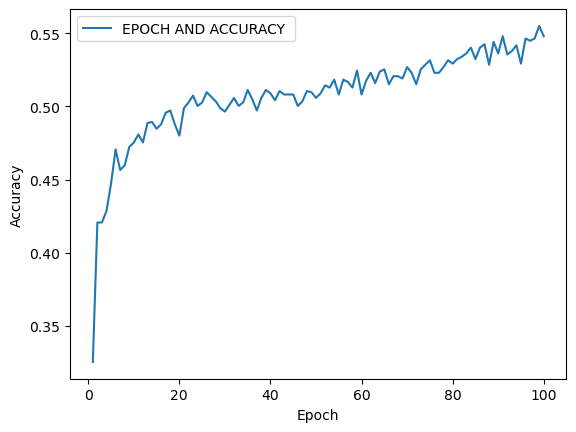

In [8]:
accuracy=fit_data.history['accuracy']
epoch=range(1,len(accuracy)+1)
plt.plot(epoch,accuracy,label='EPOCH AND ACCURACY ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

LOSS VS EPOCH

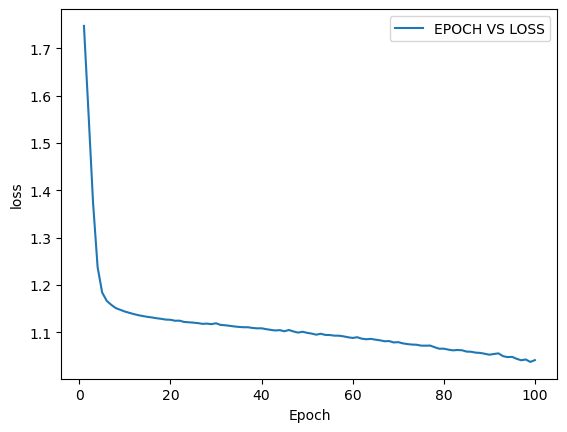

In [9]:
loss=fit_data.history['loss']
epoch=range(1,len(loss)+1)
plt.plot(epoch,loss,label='EPOCH VS LOSS')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
y_pred=model.predict(X_test)
d={0:3,1:4,2:5,3:6,4:7,5:8}
Y_pred=[]
for i in range(0,320):
    amax=np.argmax(y_pred[i])
    Y_pred.append(amax)
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_pred,Y_test)
confusion_matrix

10/10 [==============================] - 0s 2ms/step


array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 4,  6, 75, 42,  2,  0],
       [ 1,  5, 68, 91, 18,  3],
       [ 0,  0,  0,  3,  2,  0],
       [ 0,  0,  0,  0,  0,  0]])

In [11]:
ACCURACY={}
PRECISION={}
RECALL={}
F1_SCORE={}
for i in range(0,confusion_matrix.shape[0]):
    TP=confusion_matrix[i,i]
    FP=confusion_matrix[i,:].sum()-TP
    FN=confusion_matrix[:,i].sum()-TP
    TN=confusion_matrix.sum().sum()-TP-FP-FN
    if TP==0 and FP==0 :
        ACCURACY[i]=TP+TN/(confusion_matrix.sum().sum())
        PRECISION[i]=0
        RECALL[i]=TP/(TP+FN)
        F1_SCORE[i]=0
    else:
        ACCURACY[i]=TP+TN/(confusion_matrix.sum().sum())
        PRECISION[i]=TP/(TP+FP)
        RECALL[i]=TP/(TP+FN)
        F1_SCORE[i]=(2*PRECISION[i]*RECALL[i])/(PRECISION[i]+RECALL[i])

In [12]:
A=ACCURACY.values()
R=RECALL.values()
P=PRECISION.values()
F1=F1_SCORE.values()

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

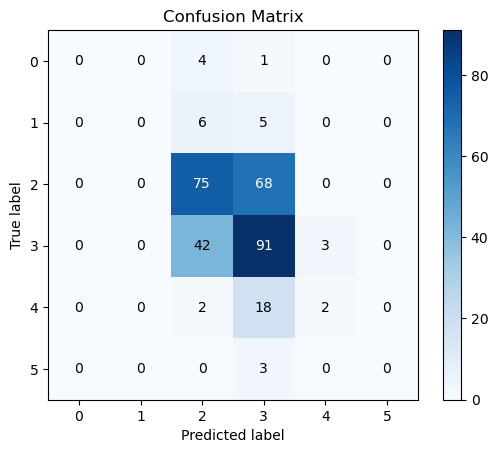

In [13]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)

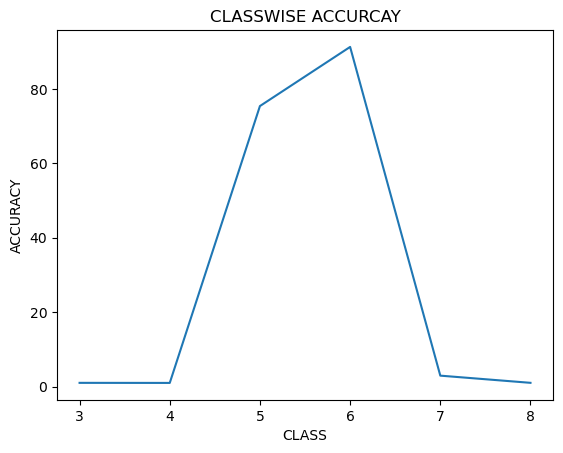

In [14]:

f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(A)))
plt.title('CLASSWISE ACCURCAY')
plt.xlabel('CLASS')
plt.ylabel('ACCURACY')
plt.show()

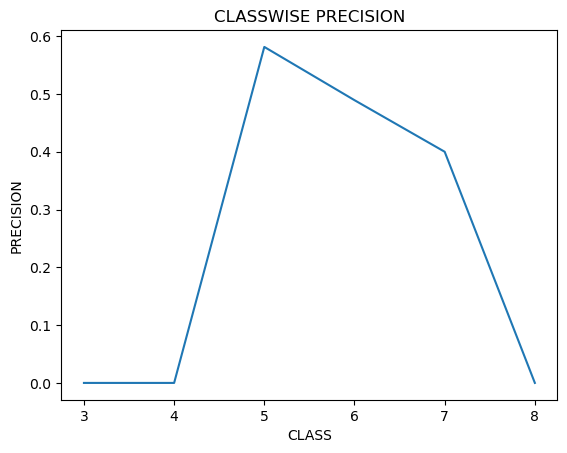

In [15]:
f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(P)))
plt.title('CLASSWISE PRECISION')
plt.xlabel('CLASS')
plt.ylabel('PRECISION')
plt.show()

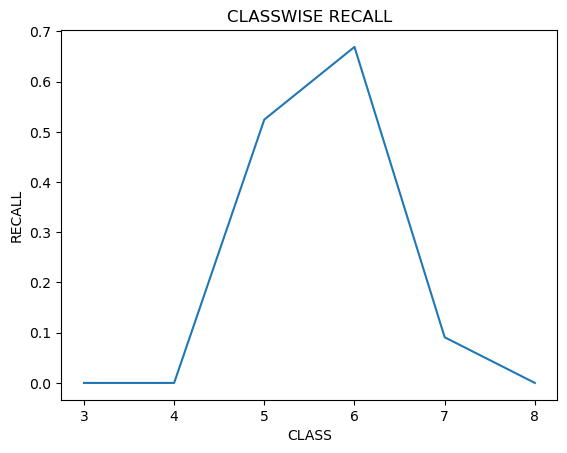

In [16]:
f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(R)))
plt.title('CLASSWISE RECALL')
plt.xlabel('CLASS')
plt.ylabel('RECALL')
plt.show()

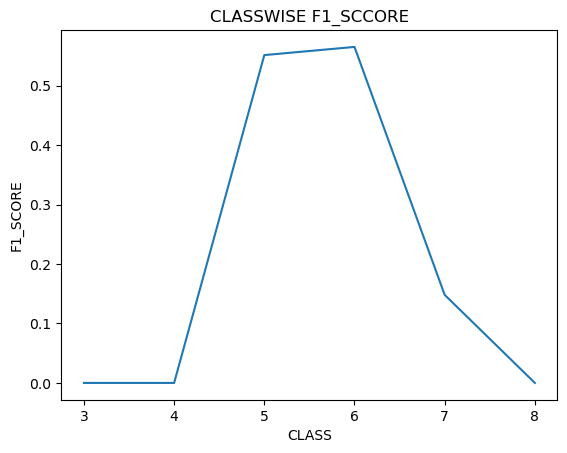

In [17]:
f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(F1)))
plt.title('CLASSWISE F1_SCCORE')
plt.xlabel('CLASS')
plt.ylabel('F1_SCORE')
plt.show()